In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

path = "C:\\datasets\\spe\\IEA CCUS Projects Database 2024.xlsx"
df = pd.read_excel(path, sheet_name="CCUS Projects Database")

In [2]:
df

,Project name,ID,Country,Partners,Project type,Announcement,FID,Operation,Suspension/decommissioning,Project Status,...,Ref 5,Ref 6,Ref 7,Link 1,Link 2,Link 3,Link 4,Link 5,Link 6,Link 7
0,3D DMX ArcelorMittal and IFPEN Dunkirk (full-s...,1,France,"ArcelorMittal, ifp, Axens, Uetikon, Grassco, b...",Capture,2019.0,NaN,2025.0,NaN,Planned,...,NaN,NaN,NaN,Link 1,Link 2,NaN,NaN,NaN,NaN,NaN
1,3D DMX ArcelorMittal and IFPEN Dunkirk 'REUZE',751,France,"ArcelorMittal, Engie, Infinium",CCU,2022.0,2024.0,2025.0,NaN,Planned,...,NaN,NaN,NaN,Link 1,Link 2,NaN,NaN,NaN,NaN,NaN
2,7 Blue Ammonia Facility,1055,Qatar,"QAFCO, thyssenkrupp Uhde/Consolidated Contract...",Full Chain,2022.0,2022.0,2026.0,NaN,Under construction,...,NaN,NaN,NaN,Link 1,Link 2,NaN,NaN,NaN,NaN,NaN
3,8Rivers H2 (8RH2) (WY),3,United States,"8Rivers, Wyoming Energy Authority",Capture,2022.0,NaN,NaN,NaN,Planned,...,NaN,NaN,NaN,Link 1,NaN,NaN,NaN,NaN,NaN,NaN
4,Abadi CCS/CCUS,227,Indonesia,"Inpex Masela 65%, Shell (trying to find a buye...",Full chain,2018.0,NaN,2027.0,NaN,Planned,...,NaN,NaN,NaN,Link 1,Link 2,Link 3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,Yara Pilbara ammonia,788,Australia,"Yara, JERA",Capture,2021.0,NaN,NaN,NaN,Planned,...,NaN,NaN,NaN,Link 1,NaN,NaN,NaN,NaN,NaN,NaN
840,Yara Sluiskil fertiliser,465,Netherlands,Yara,Capture,2022.0,2023.0,2026.0,NaN,Under construction,...,NaN,NaN,NaN,Link 1,Link 2,Link 3,NaN,NaN,NaN,NaN
841,Yara-BASF Gulf Coast,826,United States,"Yara, BASF",Capture,2023.0,NaN,2028.0,NaN,Planned,...,NaN,NaN,NaN,Link 1,NaN,NaN,NaN,NaN,NaN,NaN
842,ZerCal250,640,United Kingdom,"Origin, Singleton Birch",Capture,2021.0,NaN,NaN,NaN,Planned,...,NaN,NaN,NaN,Link 1,Link 2,NaN,NaN,NaN,NaN,NaN


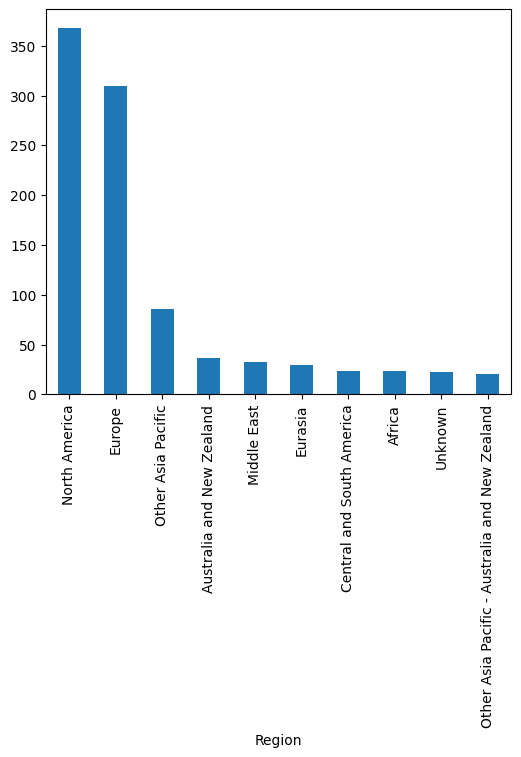

In [13]:
country_count = df.groupby('Country').size().sort_values(ascending=False).plot(kind='bar', figsize=(12, 5))
region_count = df.groupby('Region').size().sort_values(ascending=False).plot(kind='bar', figsize=(6, 5))

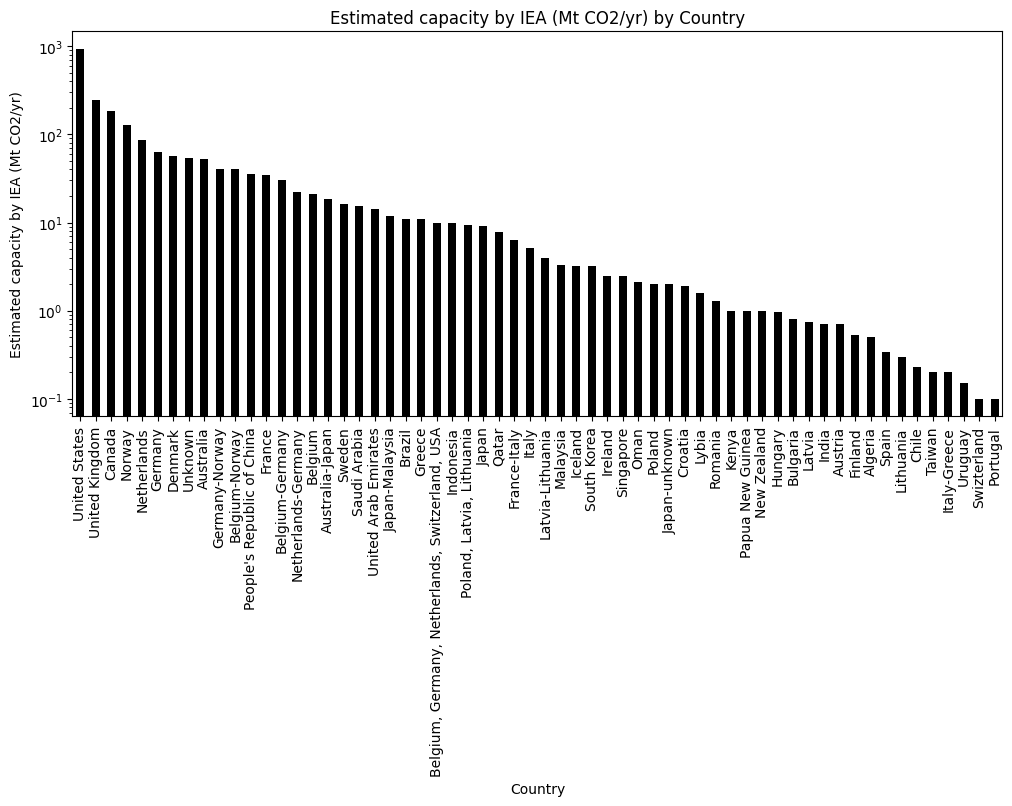

In [39]:
# drop the ones where the Estimated capacity by IEA (Mt CO2/yr) is NaN
df = df.dropna(subset=['Estimated capacity by IEA (Mt CO2/yr)']).reset_index(drop=True)
# group by country and sum the Estimated capacity by IEA (Mt CO2/yr)
country_capacity = df.groupby('Country')['Estimated capacity by IEA (Mt CO2/yr)'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12, 5), color='black')
plt.yscale('log')
plt.xlabel('Country')
plt.ylabel('Estimated capacity by IEA (Mt CO2/yr)')
plt.title('Estimated capacity by IEA (Mt CO2/yr) by Country')
plt.show()

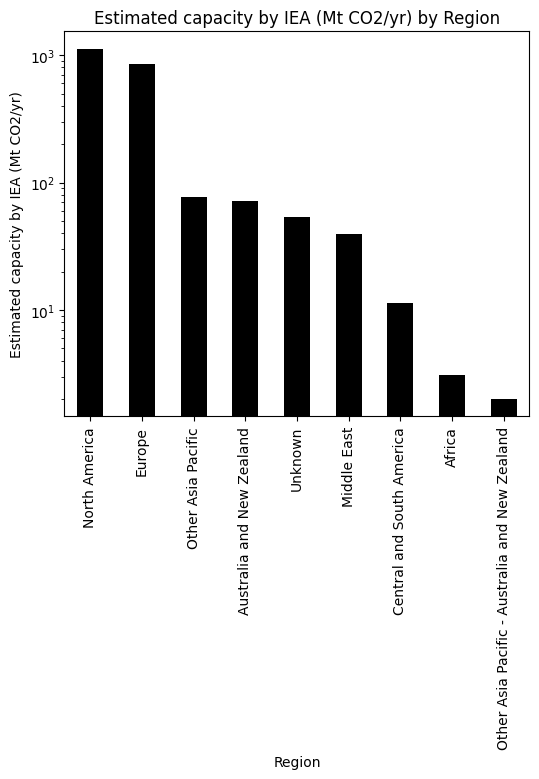

In [40]:
region_capacity = df.groupby('Region')['Estimated capacity by IEA (Mt CO2/yr)'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(6, 5), color='black')
plt.yscale('log')
plt.xlabel('Region')
plt.ylabel('Estimated capacity by IEA (Mt CO2/yr)')
plt.title('Estimated capacity by IEA (Mt CO2/yr) by Region')
plt.show()

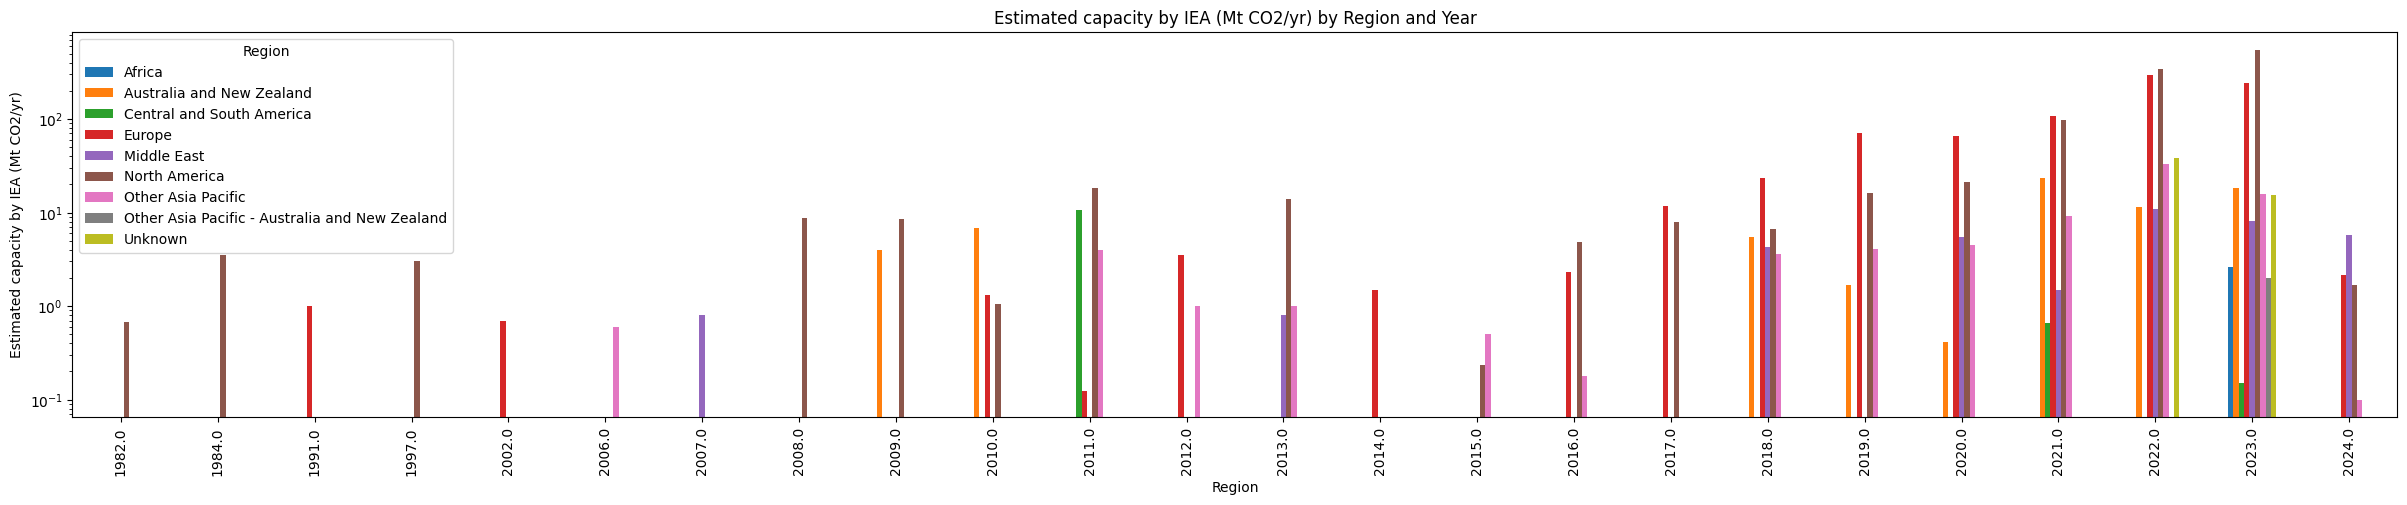

In [45]:
# group by region and year and sum the Estimated capacity by IEA (Mt CO2/yr)
region_year_capacity = df.groupby(['Announcement', 'Region'])['Estimated capacity by IEA (Mt CO2/yr)'].sum().unstack().plot(kind='bar', figsize=(30, 5))
plt.yscale('log')
plt.xlabel('Region')
plt.ylabel('Estimated capacity by IEA (Mt CO2/yr)')
plt.title('Estimated capacity by IEA (Mt CO2/yr) by Region and Year')
plt.show()

In [48]:
# make sure in Project type column the Full chain is Full Chain
df['Project type'] = df['Project type'].replace('Full chain', 'Full Chain')

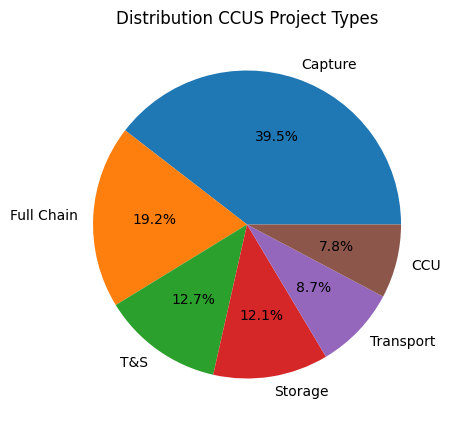

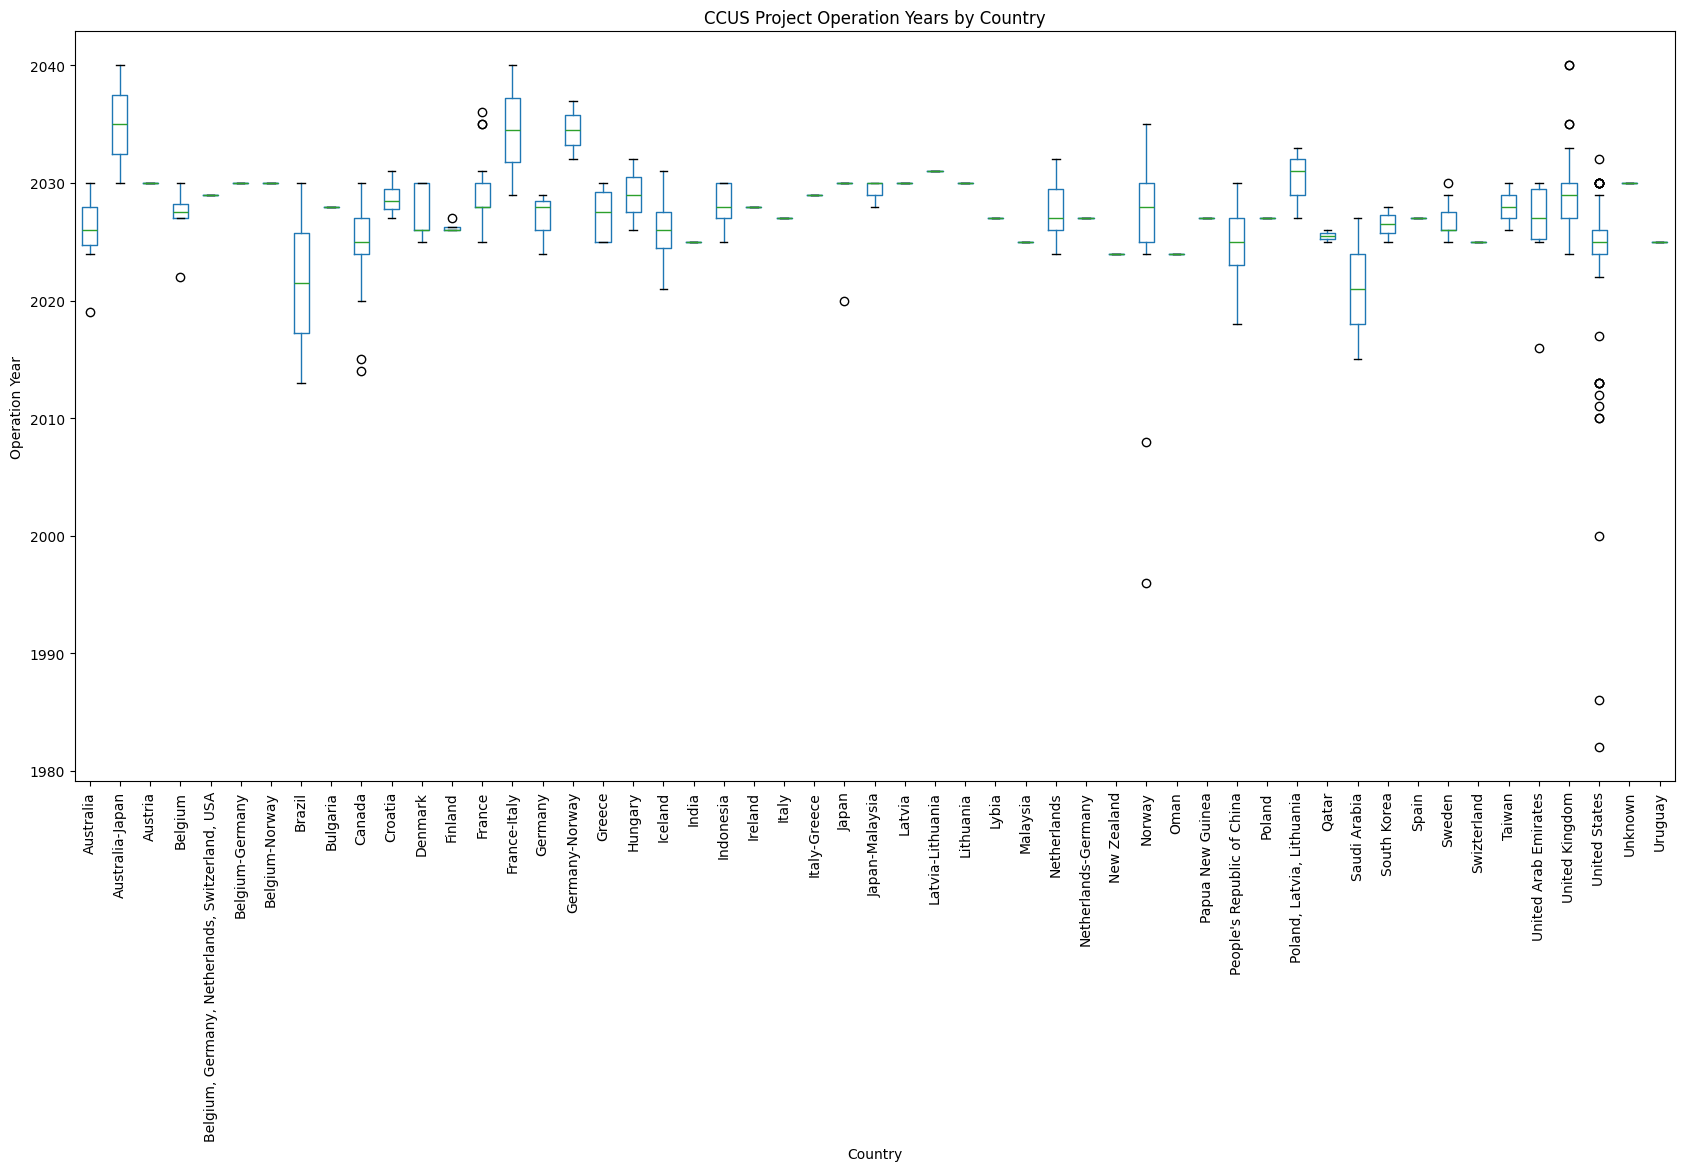

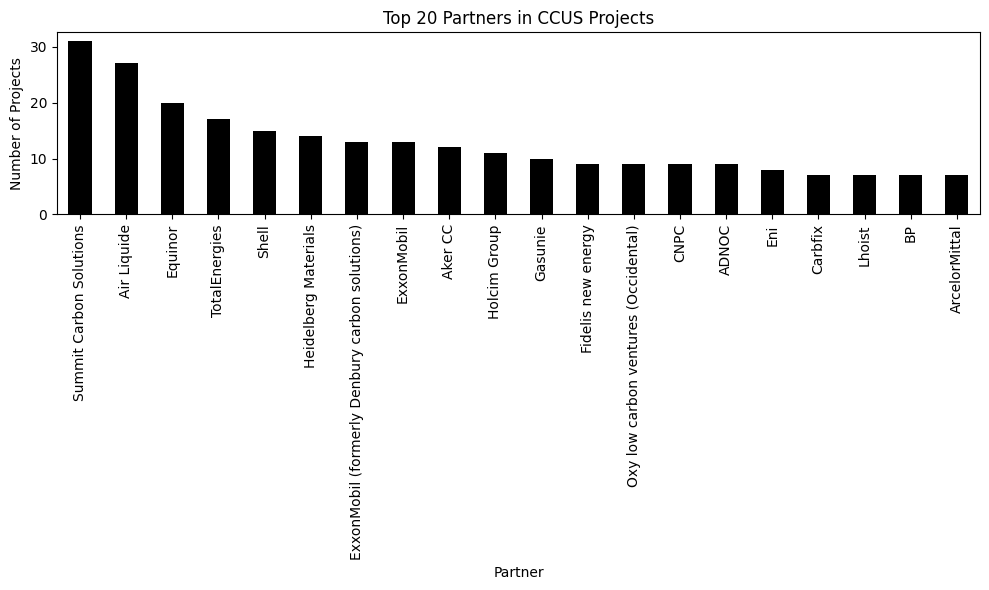

In [54]:
# 2. Study the distribution of project types (Capture, CCU, Full Chain)
project_type_counts = df['Project type'].value_counts()

# Plot for distribution of project types
plt.figure(figsize=(7,5))
project_type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution CCUS Project Types')
plt.ylabel('')
plt.show()

# 3. Investigate project timelines and the pace of development in different regions
df_timelines = df[['Country', 'Announcement', 'Operation']].dropna()

# Creating a boxplot to see the spread of operation years by country
df_timelines.boxplot(by='Country', column=['Operation'], grid=False, rot=90, figsize=(20,10))
plt.title('CCUS Project Operation Years by Country')
plt.suptitle('')
plt.xlabel('Country')
plt.ylabel('Operation Year')
plt.show()

# 4. Assess the involvement of various partners and organizations in CCUS activities
partner_counts = df['Partners'].str.split(', ').explode().value_counts()

# Plot for involvement of partners and organizations
plt.figure(figsize=(10,6))
partner_counts.head(20).plot(kind='bar', color='black')
plt.title('Top 20 Partners in CCUS Projects')
plt.xlabel('Partner')
plt.ylabel('Number of Projects')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

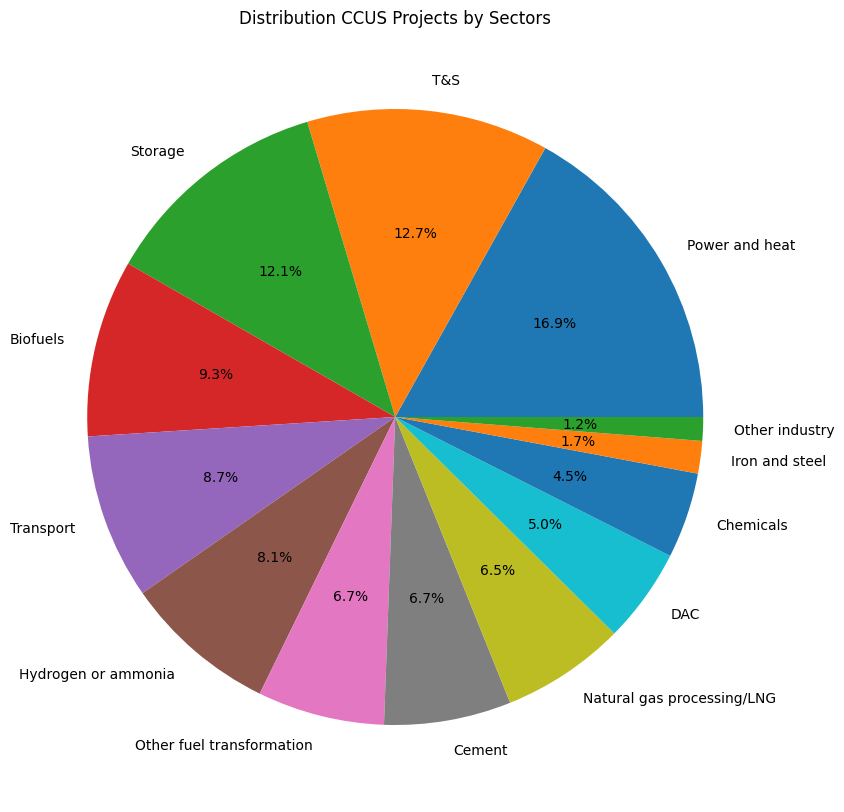

In [66]:
# 2. Study the distribution of project types (Capture, CCU, Full Chain)
project_type_counts = df['Sector'].value_counts()

# Plot for distribution of project types
plt.figure(figsize=(10,10))
project_type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution CCUS Projects by Sectors')
plt.ylabel('')
plt.show()

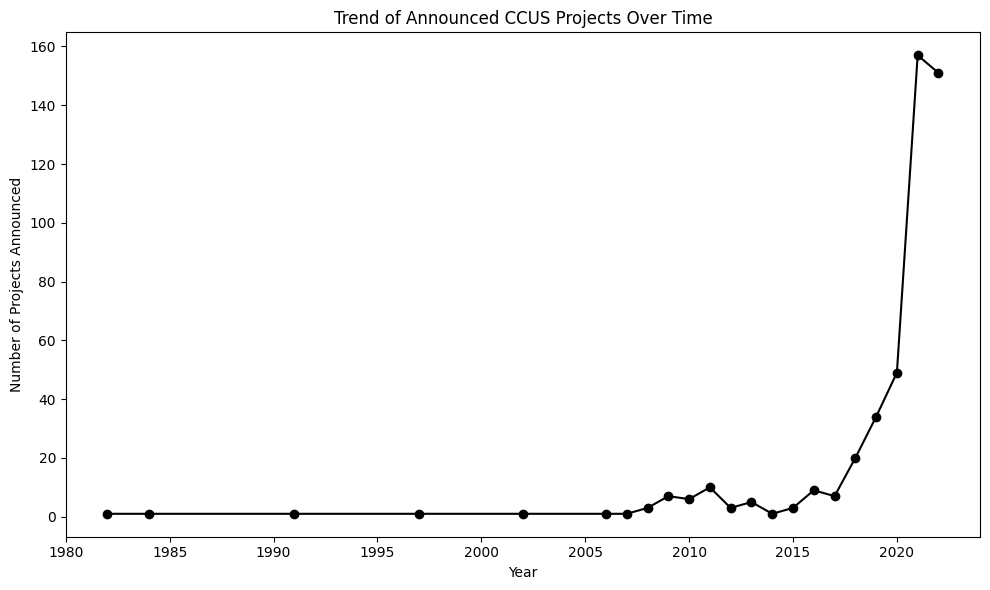

In [59]:
df_announcements = df['Announcement'].dropna().astype(int).value_counts().sort_index()[:-2]

# Plot for trend of announced projects over time
plt.figure(figsize=(10,6))
df_announcements.plot(kind='line', marker='o', color='black')
plt.title('Trend of Announced CCUS Projects Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Projects Announced')
# plt.grid(True)
plt.tight_layout()
plt.show()

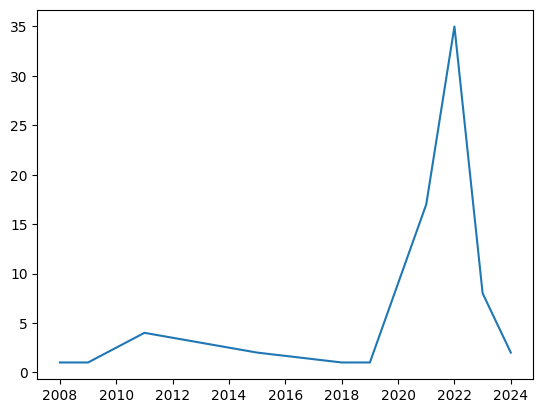

In [12]:
# show a trend of the projects in canada
canada_projects = df[df['Country'] == 'Canada'].reset_index(drop=True)
# plot based on announced years
project_counts = canada_projects.groupby('Announcement')['Project name'].count()
plt.plot(project_counts)

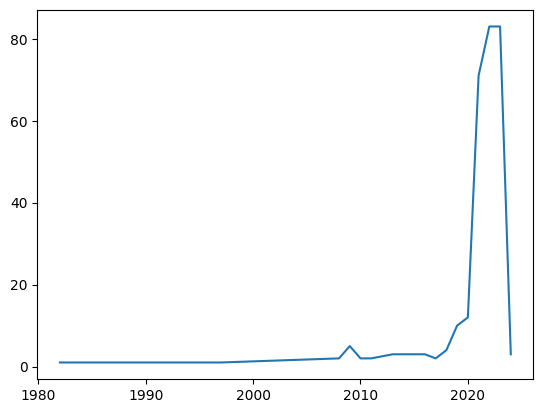

In [3]:
usa_projects = df[df['Country'] == 'United States'].reset_index(drop=True)
# plot based on announced years
project_counts = usa_projects.groupby('Announcement')['Project name'].count()
plt.plot(project_counts)

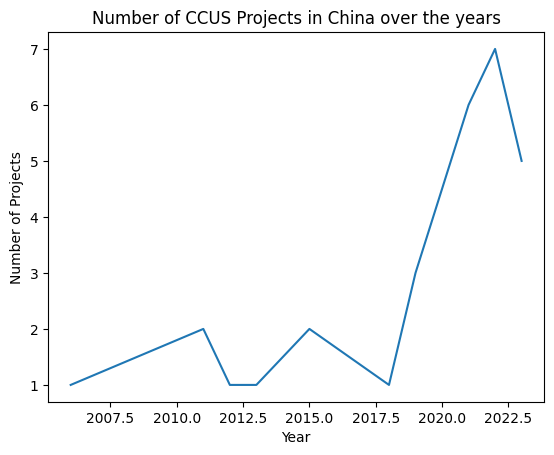

In [4]:
index_list = []
for inx, row in enumerate(df['Country'].values):
    if 'china' in row or 'China' in row:
        index_list.append(inx)
china_projects = df.iloc[index_list].reset_index(drop=True)
project_counts = china_projects.groupby('Announcement')['Project name'].count()
# x-axis should only be integers in the plot
project_counts.index = project_counts.index.astype(int)
plt.xlabel("Year")
plt.ylabel("Number of Projects")
plt.title("Number of CCUS Projects in China over the years")
plt.plot(project_counts)
plt.show()

In [13]:
policy_file_path = 'C:\\datasets\\spe\\policy_indicator.xlsx'
policy_df = pd.read_excel(policy_file_path)
project_count_per_country = df.groupby('Country')['Project name'].count().reset_index()

In [29]:
# join the two dataframes on the country column
merged_df = pd.merge(project_count_per_country, policy_df, on='Country', how='left')
merged_df.dropna(subset=['policy indicator'], inplace=True)
# rename Project name column to Project count
merged_df.rename(columns={'Project name': 'Project count'}, inplace=True)

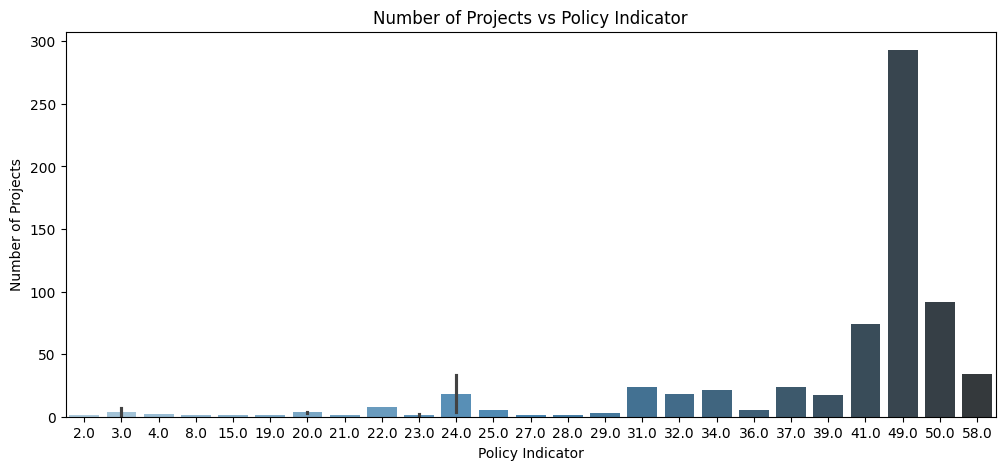

In [37]:
import seaborn as sns
# plot the number of projects per country with the policy indicator
plt.figure(figsize=(12, 5))
sns.barplot(x='policy indicator', y='Project count', data=merged_df, palette='Blues_d')
plt.ylabel('Number of Projects')
plt.xlabel('Policy Indicator')
plt.title('Number of Projects vs Policy Indicator')
plt.show()


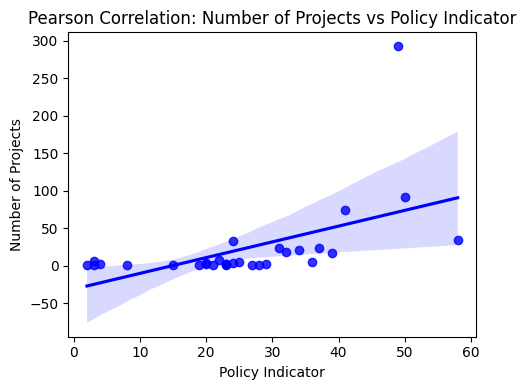

In [42]:
plt.figure(figsize=(5, 4))
sns.regplot(x='policy indicator', y='Project count', data=merged_df, scatter=True, color='blue')

plt.ylabel('Number of Projects')
plt.xlabel('Policy Indicator')
plt.title('Pearson Correlation: Number of Projects vs Policy Indicator')

# Show the plot
plt.tight_layout()
plt.show()